## Polynomial Curve Fitting
We are going to implement linear regression.

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv

### load input and target data

In [2]:
data_dir = './data/'
train_f = '4_train.csv'
test_f = '4_test.csv'
df_tr = pd.read_csv(data_dir+train_f)
df_ts = pd.read_csv(data_dir+test_f)
tr_target = df_tr['t']
tr_input = df_tr['x']
ts_target = df_ts['t']
ts_input = df_ts['x']
N_tr = len(tr_target)
N_ts = len(ts_target)
print(df_tr)
print(df_ts)
# print(type(tr_target))
# print(len(tr_target))
# print(tr_target[19])
# print(tr_target)
# print(ts_input)

           t         x
0   1.976161  6.283185
1  -1.016098  4.983216
2  -0.266196  1.516631
3  -2.293825  1.949954
4   1.944328  0.216662
5  -0.292339  1.733292
6  -2.633983  2.166616
7   1.032668  6.066524
8   1.537347  4.116570
9  -1.634889  5.849862
10  5.296590  0.649985
11  6.252524  0.866646
12  1.234146  1.299969
13 -0.859153  4.549893
14 -4.277794  2.816600
15  1.617105  3.899908
16  3.831000  0.433323
17  2.433068  0.000000
18 -0.583350  3.033262
19 -3.399715  5.633201
          t         x
0 -4.433719  2.383277
1 -0.695587  5.199877
2  1.392657  4.333231
3 -2.345476  3.249923
4 -3.565646  2.599939
5  3.890801  1.083308
6  0.244838  3.466585
7 -0.289697  5.416539
8  1.309478  4.766554
9  0.958873  3.683247


### Find Best weight base on training data and evaluate on testing data
### 1. Non-regularized error function
fit the data by applying a polynomial function of the form:

$$y(x, w) = w_{0} + w_{1}*x + w_{1}*x^{2} + ... + w_{M}*x^{M} = \sum_{j=0}^{M}w_j*x^{j}$$

and minimize the Error function at the same time, the error function look as follows:

$$E(w) = \frac{1}{2}*\sum_{n=1}^{N}(y(x_n,w)-t_n)^{2} $$

In [26]:
'''
base on the formula we can then know that the best W = (phi^T * phi)^-1 * phi^T * t.
which phi = [[x1^0,x1^1....x1^M],[x2^0,x2^1....x2^M], .... [xN^0,xN^1....xN^M]]
which t = [t1,t2,t3 ... ,tN]
The output result of W would be in dimension of (M+1)*1
''' 

tr_rms_ary = []
ts_rms_ary = []
for M in range(1,10):
    # Init data-num, valu-M and matrix-initialization
    N = len(tr_input)
    Phi_mat = np.zeros((N,M+1))
    T = np.zeros((N,1))
    W = np.zeros((M,1))
    # print(Phi_mat.shape)

    for r_idx in range(Phi_mat.shape[0]):
        for c_idx in range(Phi_mat.shape[1]):
            Phi_mat[r_idx][c_idx] = tr_input[r_idx]**(c_idx)

        T[r_idx][0] = tr_target[r_idx]

    # Start calculating W result
    phi_transpose = Phi_mat.transpose()
    W_tmp = inv(np.dot(phi_transpose , Phi_mat))
    W = np.dot( np.dot(W_tmp , phi_transpose) , T)


    # Root mean square
    def poly_func (x, w_ary):
        y = 0
        for i in range(len(w_ary)):
            y += w_ary[i]*(x**i)
        return y

    def Cal_rms(length, input_data, target_data, W):
        Err = 0
        for n in range(length):
            # careful on the transpose result have to index into it again
            Err += (poly_func(input_data[n], W.transpose()[0]) - target_data[n])**2 
        Err /= 2
        RMS_err = np.sqrt((2*Err)/length)
        
        return RMS_err
    
    RMS_err_tr = Cal_rms(N_tr, tr_input, tr_target, W)
    RMS_err_ts = Cal_rms(N_ts, ts_input, ts_target, W)
    tr_rms_ary.append(RMS_err_tr)
    ts_rms_ary.append(RMS_err_ts)
    
    print('training rms-Err for M = %s is %s.' % (str(M),str(RMS_err_tr)))
    print('testing rms-Err for M = %s is %s.' % (str(M),str(RMS_err_ts)))
    
#     Err_tr = 0
#     Err_ts = 0
#     for n in range(N_tr):
#         # careful on the transpose result have to index into it again
#         Err_tr += (poly_func(tr_input[n], W.transpose()[0]) - tr_target[n])**2 
#     Err_tr /= 2
#     RMS_err_tr = np.sqrt((2*Err_tr)/N_tr)
#     print('training rms-Err for M = %s is %s.' % (str(M),str(RMS_err_tr)))
#     for n in range(N_ts):
#         # careful on the transpose result have to index into it again
#         Err_ts += (poly_func(ts_input[n], W.transpose()[0]) - ts_target[n])**2 
#     Err_ts /= 2
#     RMS_err_ts = np.sqrt((2*Err_ts)/N_ts)
#     print('testing rms-Err for M = %s is %s.' % (str(M),str(RMS_err_ts)))

training rms-Err for M = 1 is 2.43625016533.
testing rms-Err for M = 1 is 2.55512423758.
training rms-Err for M = 2 is 2.09847079707.
testing rms-Err for M = 2 is 2.272433502.
training rms-Err for M = 3 is 2.09426470667.
testing rms-Err for M = 3 is 2.20199758179.
training rms-Err for M = 4 is 2.0678005492.
testing rms-Err for M = 4 is 2.08337259908.
training rms-Err for M = 5 is 1.11914381432.
testing rms-Err for M = 5 is 1.25146852378.
training rms-Err for M = 6 is 1.11663205567.
testing rms-Err for M = 6 is 1.21720169395.
training rms-Err for M = 7 is 0.836488442361.
testing rms-Err for M = 7 is 1.56119720846.
training rms-Err for M = 8 is 0.816067604021.
testing rms-Err for M = 8 is 1.48315822277.
training rms-Err for M = 9 is 0.752874115134.
testing rms-Err for M = 9 is 1.5594867296.


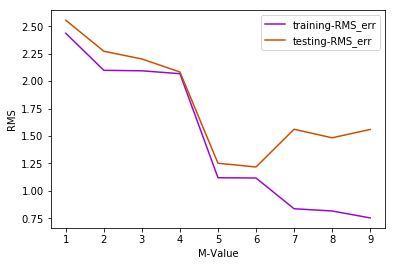

In [27]:
# visualize result
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
plt.plot(range(1,10),tr_rms_ary ,color=colors[1], label='training-RMS_err'.format(i=0))
plt.plot(range(1,10),ts_rms_ary ,color=colors[2], label='testing-RMS_err'.format(i=1))
#          'ro-', label='training-RMSerr'.format(0),range(1,10),ts_rms_ary,'bo-',label='testing-RMSerr'.format(0))
# plt.axis([0, 6, 0, 20])
plt.legend(loc='best')
plt.xlabel('M-Value')
plt.ylabel('RMS')
plt.savefig('hw1-4-(1)_non_regularize.png')

plt.show()
plt.close(fig)

In [6]:

# test functino on dot
a = np.array([[1., 2.], [3., 4.]])
b = np.array([[1., 2.], [3., 4.]])
np.dot(a, b)

array([[  7.,  10.],
       [ 15.,  22.]])

### 2. Regularized error function
Now the error function turn out ot be:

$$E(w) = \frac{1}{2}*\sum_{n=1}^{N}(y(x_n,w)-t_n)^{2} + \frac{\lambda}{2}*||w||^{2} $$

which $||w||^{2} = w^{T}*w = w_0^{2} + w_1^{2} + w_2^{2} + .... + w_M^{2}.$

Also the oder of polynomial function will be fix at 9, i.e. **M=9**, and set **$ln(\lambda)$ from -20 to 0**

In [22]:
'''
The idea is just the same as non-regularized-error-function problem,
but the solutoin of W will turn out to have additional 'lambda' in the equation.
'''

# Init data-num, valu-M and matrix-initialization
lnLambdas = list(range(-20,1))
tr_rms_ary = []
ts_rms_ary = []
M = 9
for _, lnLambda in enumerate(lnLambdas):
    Phi_mat = np.zeros((N_tr,M+1))
    T = np.zeros((N_tr,1))
    W = np.zeros((M,1))
    # print(Phi_mat.shape)

    for r_idx in range(Phi_mat.shape[0]):
        for c_idx in range(Phi_mat.shape[1]):
            Phi_mat[r_idx][c_idx] = tr_input[r_idx]**(c_idx)

        T[r_idx][0] = tr_target[r_idx]

    # Start calculating W result (note this is regularized-err-function, whould include lamda as consideration)
    lambda_val = np.exp(lnLambda)

    phi_transpose = Phi_mat.transpose()
    lambda_mat = np.identity(M+1)*lambda_val
    W_tmp = inv(np.dot(phi_transpose , Phi_mat) + lambda_mat)
    W = np.dot( np.dot(W_tmp , phi_transpose) , T)


    # Root mean square
    RMS_err_tr = Cal_rms(N_tr, tr_input, tr_target, W)
    RMS_err_ts = Cal_rms(N_ts, ts_input, ts_target, W)
    tr_rms_ary.append(RMS_err_tr)
    ts_rms_ary.append(RMS_err_ts)

    print('training rms-Err for ln(lambda) = %s is %s.' % (str(lnLambda),str(RMS_err_tr)))
    print('testing rms-Err for ln(lambda) = %s is %s.' % (str(lnLambda),str(RMS_err_ts)))

training rms-Err for ln(lambda) = -20 is 0.75287411521.
testing rms-Err for ln(lambda) = -20 is 1.55949286385.
training rms-Err for ln(lambda) = -19 is 0.752874117322.
testing rms-Err for ln(lambda) = -19 is 1.55947498808.
training rms-Err for ln(lambda) = -18 is 0.752874121125.
testing rms-Err for ln(lambda) = -18 is 1.55949333466.
training rms-Err for ln(lambda) = -17 is 0.752874139483.
testing rms-Err for ln(lambda) = -17 is 1.55946173366.
training rms-Err for ln(lambda) = -16 is 0.752874249273.
testing rms-Err for ln(lambda) = -16 is 1.55941137435.
training rms-Err for ln(lambda) = -15 is 0.752874958247.
testing rms-Err for ln(lambda) = -15 is 1.55925803082.
training rms-Err for ln(lambda) = -14 is 0.752879940746.
testing rms-Err for ln(lambda) = -14 is 1.55883622112.
training rms-Err for ln(lambda) = -13 is 0.752915422749.
testing rms-Err for ln(lambda) = -13 is 1.55772454906.
training rms-Err for ln(lambda) = -12 is 0.753159199388.
testing rms-Err for ln(lambda) = -12 is 1.554875

In [23]:
# test on identity matrix
test_ = np.identity(3)
test_k = test_*3
print(test_)
print(test_k)
print(np.exp(2))
print(range(3))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 3.  0.  0.]
 [ 0.  3.  0.]
 [ 0.  0.  3.]]
7.38905609893
range(0, 3)


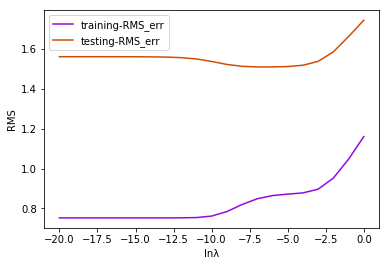

In [25]:
# visualize result
fig = plt.figure()
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
plt.plot(lnLambdas,tr_rms_ary ,color=colors[1], label='training-RMS_err'.format(i=0))
plt.plot(lnLambdas,ts_rms_ary ,color=colors[2], label='testing-RMS_err'.format(i=1))
#          'ro-', label='training-RMSerr'.format(0),range(1,10),ts_rms_ary,'bo-',label='testing-RMSerr'.format(0))
# plt.axis([0, 6, 0, 20])
plt.legend(loc='best')
plt.xlabel('lnλ')
plt.ylabel('RMS')
plt.savefig('hw1-4-(2)_regularize.png')

plt.show()
plt.close(fig)